In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re

In [2]:
link_prefix = 'https://www.pgatour.com'
year = '.2018.'
dataframes = []

In [3]:
url = 'https://www.pgatour.com/stats.html'
html = urlopen(url)

soup = BeautifulSoup(html, 'lxml')

soup_links = soup.find_all('a', attrs={'href': re.compile("^/stats/categories")})

category_links = [] 
for link in soup_links:
    category_links.append(link.get("href"))
    
category_links = [link_prefix + link for link in category_links]

In [4]:
category_links

['https://www.pgatour.com/stats/categories.ROTT_INQ.html',
 'https://www.pgatour.com/stats/categories.RAPP_INQ.html',
 'https://www.pgatour.com/stats/categories.RARG_INQ.html',
 'https://www.pgatour.com/stats/categories.RPUT_INQ.html',
 'https://www.pgatour.com/stats/categories.RSCR_INQ.html',
 'https://www.pgatour.com/stats/categories.RSTR_INQ.html',
 'https://www.pgatour.com/stats/categories.RMNY_INQ.html',
 'https://www.pgatour.com/stats/categories.RPTS_INQ.html']

In [ ]:
for link in category_links:

    url = link
    html = urlopen(url)

    soup = BeautifulSoup(html, 'lxml')
    soup = soup.find('div', class_="section categories")
    soup_links = soup.find_all(attrs={'href': re.compile("^/stats/stat")})

    stat_links = []
    
    for link in soup_links:
        stat_links.append(link.get("href"))

    stat_links_with_year = []
    for link in stat_links:
        position = link.rfind(".")
        link = link[:position] + year + link[position+1:]
        stat_links_with_year.append(link)  

    stat_links_with_year = [link_prefix + link for link in stat_links_with_year]

    for link in stat_links_with_year:
        html = urlopen(link)
        soup = BeautifulSoup(html, 'lxml')               

        tables = pd.read_html(link)
        df = tables[1]
        df = df.add_prefix(soup.title.text + ' | ')               
        dataframes.append(df)

In [ ]:
for df in dataframes:
    df.columns = df.columns.str.replace('Stat – ', '')

In [ ]:
rank = dataframes.copy()

In [ ]:
rank = []
for df in dataframes:
    df = df.iloc[:,[0,2]]
    try:
        df = df.set_index(df.columns[df.columns.str.lower().str.contains('player name')][0])
        df.index.rename('Player Name', inplace=True)
        df = df.reset_index().drop_duplicates(subset='Player Name',keep='first').set_index('Player Name')
        rank.append(df)
    except:
        pass 

In [ ]:
df = rank[541]
del rank[541]

for rank_df in rank:   
    df = df.merge(rank_df, left_index=True, right_index=True, how='left')

In [10]:
links = [
    'https://www.pgatour.com/stats/stat.408.2018.html',
    'https://www.pgatour.com/stats/stat.407.2018.html',
    'https://www.pgatour.com/stats/stat.406.2018.html',
    'https://www.pgatour.com/stats/stat.405.2018.html',
    'https://www.pgatour.com/stats/stat.404.2018.html',
    'https://www.pgatour.com/stats/stat.485.2018.html',
    'https://www.pgatour.com/stats/stat.02427.2018.html'   
]   

names = ['>25', '20-25', '15-20', '10-15', '5-10', '4-8', '3-5']


In [12]:
putting_percent = pd.read_html('https://www.pgatour.com/stats/stat.127.2018.html')[1]
putting_percent.drop_duplicates(subset=['PLAYER NAME'], inplace=True)
putting_percent = putting_percent.set_index('PLAYER NAME')['RANK THIS WEEK']
putting_percent = pd.DataFrame(putting_percent)


for link, name in zip(links, names):
    df = pd.read_html(link)[1]
    df = df[df.columns[df.columns.str.contains('PLAYER|%')]].drop_duplicates(subset=['PLAYER NAME']).set_index('PLAYER NAME')
    df.columns = [name]
    putting_percent = putting_percent.merge(df, left_index=True, right_index=True, how='left')


In [8]:
putting_percent

,RANK THIS WEEK
PLAYER NAME,
Dustin Johnson,1
Tommy Fleetwood,2
Justin Thomas,3
Rickie Fowler,4
Justin Rose,5
Hideki Matsuyama,6
Brooks Koepka,7
Rafa Cabrera Bello,8
Bryson DeChambeau,9


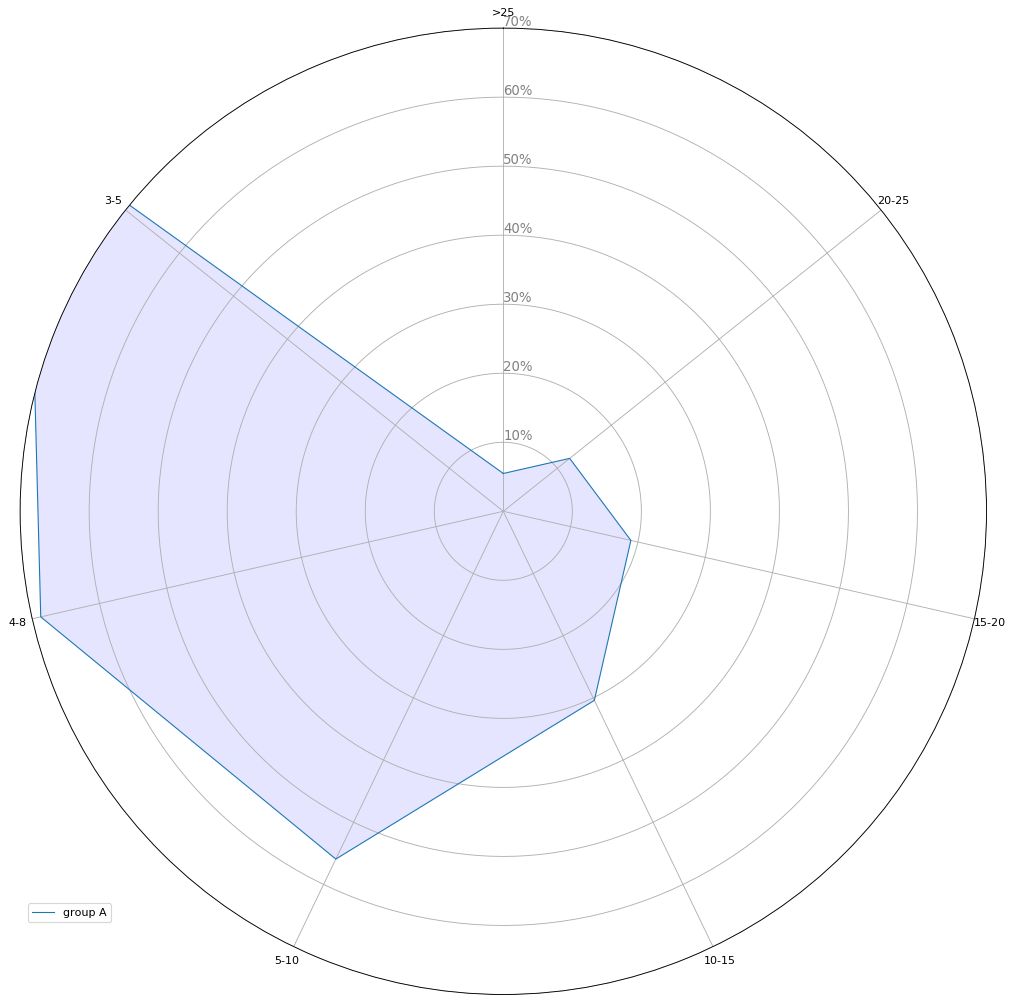

In [14]:
# ------- PART 1: Create background
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi


# number of variable
categories=list(putting_percent)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')    
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30,40,50,60,70], ["10%","20%","30%","40%","50%","60%","70%"], color="grey", size=12)
plt.ylim(0,70)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=putting_percent.iloc[:,1:].mean().values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

 

In [80]:
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 


In [81]:
df

,group,var1,var2,var3,var4,var5
0,A,38.0,29,8,7,28
1,B,1.5,10,39,31,15
2,C,30.0,9,23,33,32
3,D,4.0,34,24,14,14


In [82]:
list(df)[1:]


['var1', 'var2', 'var3', 'var4', 'var5']

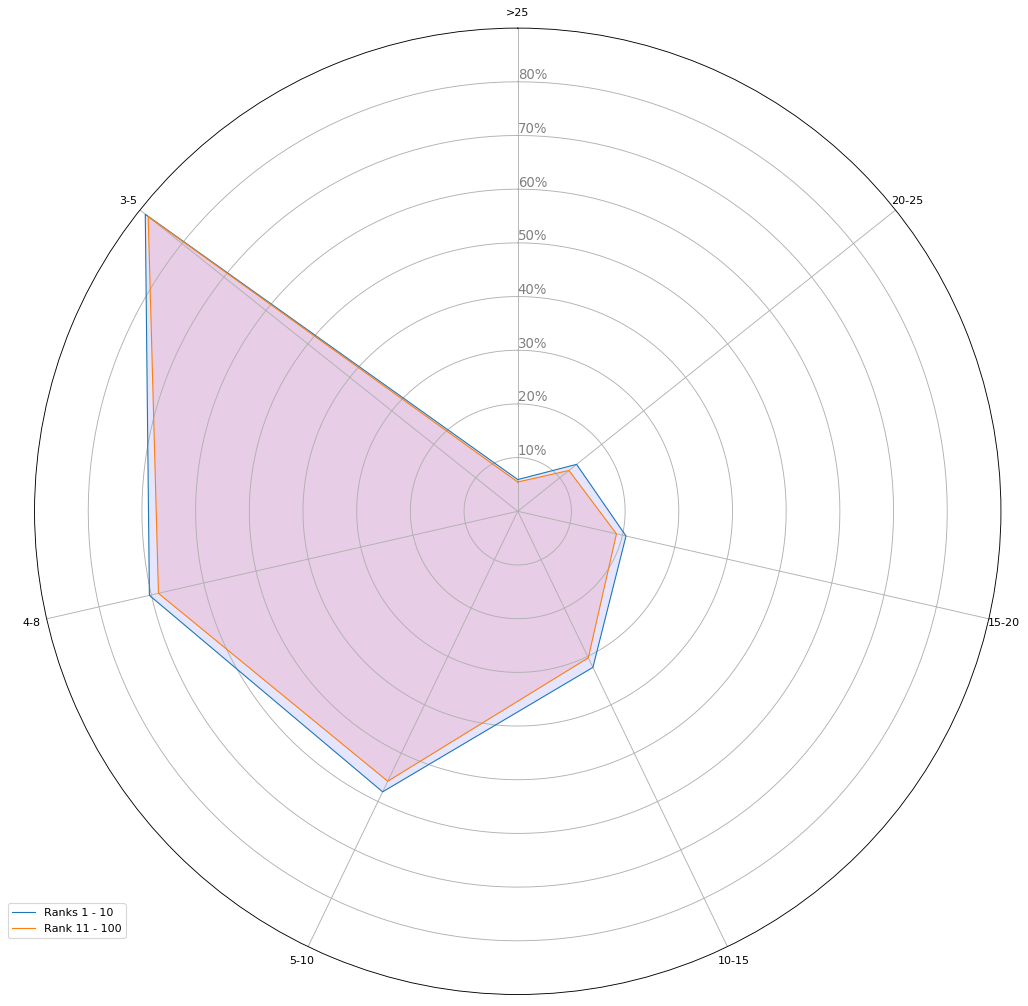

In [19]:
# ------- PART 1: Create background
 
# number of variable
categories=list(putting_percent)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')    
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30,40,50,60,70,80], ["10%","20%","30%","40%","50%","60%","70%","80%"], color="grey", size=12)
plt.ylim(0,90)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=putting_percent.iloc[:10,1:].mean().values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Ranks 1 - 10")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=putting_percent.iloc[10:,1:].mean().values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Rank 11 - 100")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


In [93]:
putting_percent = putting_percent.iloc[:100]

In [95]:
putting_percent.mean()

>25       5.5829
20-25    12.5511
15-20    19.2490
10-15    46.1433
5-10     30.6182
4-8      56.4892
3-5      69.3827
dtype: float64

In [150]:
putting_percent.iloc[25:].mean().values

array([ 5.46826667, 12.44106667, 18.9896    , 45.52653333, 29.86453333,
       55.9916    , 68.9164    ])

In [157]:
putting_percent.iloc[:25,1:].mean()

>25       5.9268
20-25    12.8812
15-20    20.0272
10-15    47.9936
5-10     32.8792
4-8      57.9820
3-5      70.7816
dtype: float64

In [158]:
putting_percent.iloc[25:,1:].dropna().mean()

>25       5.468267
20-25    12.441067
15-20    18.989600
10-15    45.526533
5-10     29.864533
4-8      55.991600
3-5      68.916400
dtype: float64